In [2]:
# Import all necessary packages and functions

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlalchemy as sa
import sql_functions as sf
import psycopg2 # for export to DBeaver: needed to get database exception errors when uploading dataframe

#pandas settings for big numbers (to not show numbers in scientific format)
pd.options.display.float_format = '{:.2f}'.format

# eumofa_countries_fishconsumption

What matters here?
- eur_kg

In [148]:
# Connection to DBeaver for necessary dataframes

schema = "capstone_fish_are_friends"
table_name = "eumofa_countries_fishconsumption"
eumofa_countries_fishconsumption = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")
# Tuna is just present for Spain and is deleted; 2009 has just one value and is deleted too
eumofa_countries_fishconsumption = eumofa_countries_fishconsumption[(eumofa_countries_fishconsumption.species != 'Tuna') & (eumofa_countries_fishconsumption.year != 2009)]
eumofa_countries_fishconsumption.head()

,country,commodity_group,species,year,value_eur,volume_t,eur_kg
0,Denmark,Pelagic fish,Salmon,2010,2355430.00,46318.20,19.66
1,Denmark,Pelagic fish,Salmon,2011,2446350.00,49184.60,20.11
2,Denmark,Pelagic fish,Salmon,2012,3206730.00,58682.70,18.30
3,Denmark,Pelagic fish,Salmon,2013,2994760.00,56390.70,18.83
4,Denmark,Pelagic fish,Salmon,2014,3148200.00,64577.20,20.51


In [143]:
#create sub df
eumofa_salmon = eumofa_countries_fishconsumption[eumofa_countries_fishconsumption.species == 'Salmon']
eumofa_shrimp = eumofa_countries_fishconsumption[eumofa_countries_fishconsumption.species == 'Shrimp']

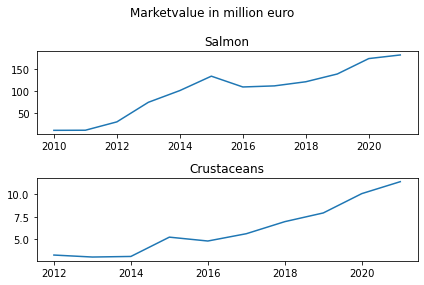

In [173]:
# Plot Marketvalue in million euro
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Marketvalue in million euro')
ax1.plot(eumofa_salmon.groupby(['year']).sum().value_eur / 10**6)
ax1.set_title('Salmon')
ax2.plot(eumofa_shrimp.groupby(['year']).sum().value_eur / 10**6)
ax2.set_title('Crustaceans')
fig.tight_layout()

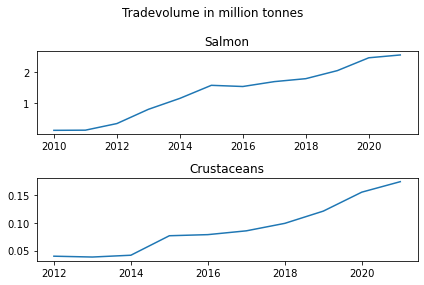

In [174]:
# Plot Tradevolume in million tonnes
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Tradevolume in million tonnes')
ax1.plot(eumofa_salmon.groupby(['year']).sum().volume_t / 10**6)
ax1.set_title('Salmon')
ax2.plot(eumofa_shrimp.groupby(['year']).sum().volume_t / 10**6)
ax2.set_title('Crustaceans')
fig.tight_layout()

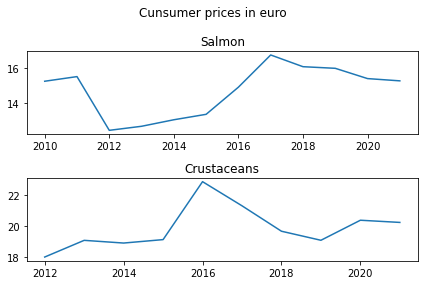

In [175]:
# Plot Cunsumer prices in euro
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Cunsumer prices in euro')
ax1.plot(eumofa_salmon.groupby(['year']).mean().eur_kg)
ax1.set_title('Salmon')
ax2.plot(eumofa_shrimp.groupby(['year']).mean().eur_kg)
ax2.set_title('Crustaceans')
fig.tight_layout()

# eurobarometer_fish1_3

In [145]:
schema = "capstone_fish_are_friends"
table_name = "eurobarometer_fish1_3"
eurobarometer_fish1_3 = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")
eurobarometer_fish1_3.questions.

array(['Q1. How frequently do you eat fishery or aquaculture products at home?',
       'Q2. How frequently do you eat fishery or aquaculture products at restaurants and other food outlets (canteens, bars, market stands etc.)?',
       'Q3. How frequently do you buy fishery or aquaculture products?'],
      dtype=object)

# eurobarometer_fish4_5

In [ ]:
schema = "capstone_fish_are_friends"
table_name = "eurobarometer_fish4_5"
eurobarometer_fish4_5 = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")


# eurobarometer_sustainable1_3

In [ ]:
schema = "capstone_fish_are_friends"
table_name = "eurobarometer_sustainable1_3"
eurobarometer_sustainable1_3 = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")


# eurobarometer_sustainable4_5

In [ ]:
schema = "capstone_fish_are_friends"
table_name = "eurobarometer_sustainable4_5"
eurobarometer_sustainable4_5 = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")

# fao_merge_eu

In [153]:
schema = "capstone_fish_are_friends"
table_name = "fao_merge_eu"
fao_merge_eu = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")

fao_merge_eu.head()

,country,categories_species,year,volume_in_t,volume_kg_capita,kcal/capita/year,protein_g/capita/year,fat_g/capita/year
0,Austria,Crustaceans,2010,10930.00,1.30,365.25,102.27,3.65
1,Austria,Pelagic fish,2010,32750.00,3.89,3652.50,416.38,193.58
2,Belgium,Crustaceans,2010,36730.00,3.36,1461.00,299.50,18.26
3,Belgium,Pelagic fish,2010,44330.00,4.05,4383.00,529.61,226.46
4,Bulgaria,Crustaceans,2010,870.00,0.12,0.00,7.30,0.00


In [ ]:
# crate sub df
crustaceans = fao_merge_eu[fao_merge_eu.categories_species == 'Crustaceans']
pelagic_fish = fao_merge_eu[fao_merge_eu.categories_species == 'Pelagic fish']

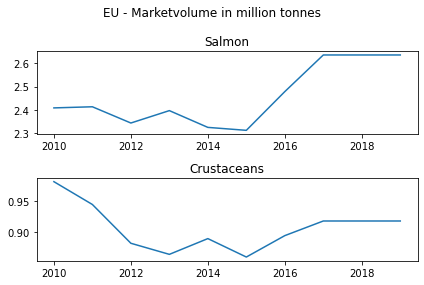

In [186]:
#Plot Tradevolume in two subplots
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('EU - Marketvolume in million tonnes')
ax1.plot(pelagic_fish.groupby(['year']).sum().volume_in_t / 10**6)
ax1.set_title('Salmon')
ax2.plot(crustaceans.groupby(['year']).sum().volume_in_t / 10**6)
ax2.set_title('Crustaceans')
fig.tight_layout()

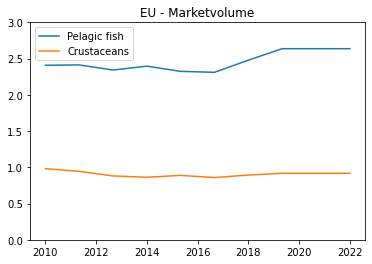

In [187]:
#Plot Tradevolume in one plot
x = np.linspace(2010, 2022, 10)
fig = plt.figure()
plt.plot(x, pelagic_fish.groupby(['year']).sum().volume_in_t / 10**6, label='Pelagic fish')
plt.plot(x, crustaceans.groupby(['year']).sum().volume_in_t / 10**6, label='Crustaceans')
plt.legend()
plt.ylim(0,3)
plt.title('EU - Marketvolume');

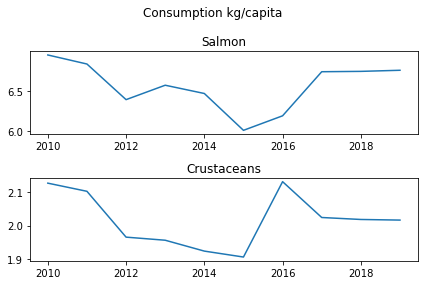

In [161]:
#Plot Consumption kg/capita in two subplots
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Consumption kg/capita')
ax1.plot(pelagic_fish.groupby(['year']).mean().volume_kg_capita)
ax1.set_title('Salmon')
ax2.plot(crustaceans.groupby(['year']).mean().volume_kg_capita)
ax2.set_title('Crustaceans')
fig.tight_layout()

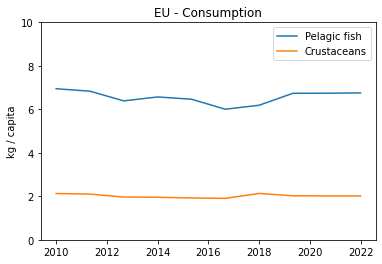

In [189]:
#Plot Consumption kg/capita in one plot
x = np.linspace(2010, 2022, 10)
fig = plt.figure()
plt.plot(x, pelagic_fish.groupby(['year']).mean().volume_kg_capita, label='Pelagic fish')
plt.plot(x, crustaceans.groupby(['year']).mean().volume_kg_capita, label='Crustaceans')
#plt.ylim(bottom=0)
plt.ylim(0,10)
plt.ylabel('kg / capita')
plt.legend()
plt.title('EU - Consumption');

# fisch_prokopf_de

In [22]:

schema = "capstone_fish_are_friends"
table_name = "fisch_prokopf_de"
fisch_prokopf_de = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")

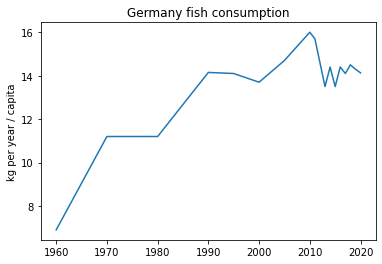

In [32]:
plt.plot(fisch_prokopf_de.year, fisch_prokopf_de.kg_per_year)
plt.title("Germany fish consumption")
plt.ylabel("kg per year / capita")
plt.show()

# monitor_2020_combined

In [ ]:
schema = "capstone_fish_are_friends"
table_name = "monitor_2020_combined"
monitor_2020_combined = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")

# monitor_2020_divided

In [ ]:
schema = "capstone_fish_are_friends"
table_name = "monitor_2020_divided"
monitor_2020_divided = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")

# smartprotein_consumer

In [ ]:
schema = "capstone_fish_are_friends"
table_name = "smartprotein_consumer"
smartprotein_consumer = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")

# smartprotein_flexitarian

In [ ]:
schema = "capstone_fish_are_friends"
table_name = "smartprotein_flexitarian"
smartprotein_flexitarian = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")

# smartprotein_q28_consumer

In [ ]:
schema = "capstone_fish_are_friends"
table_name = "smartprotein_q28_consumer"
smartprotein_q28_consumer = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")

# smartprotein_q28_flexitarian 

In [ ]:
schema = "capstone_fish_are_friends"
table_name = "smartprotein_q28_flexitarian"
smartprotein_q28_flexitarian = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")